In [1]:
import json
import os
import matplotlib.pyplot as plt
from dateutil import parser


## Get data from files

In [2]:
paths =[r"aws-serverless-1\performance_test\GET-1-0-1h-5r\test_#1",
        r"aws-serverless-1\performance_test\GET-1-0-1h-10r\test_#1",
        r"azure-serverless-1\performance_test\GET-1-0-1h-10r\test_#1",]

summary_paths = []
results_paths = []
for path in paths:
    summary_paths.append(os.path.join(path, 'summary_test.json'))
    results_paths.append(os.path.join(path, 'results_test.json'))

In [3]:
summary_data = []
for path in summary_paths:
    with open(path, 'r') as file:
        summary_data.append(json.load(file))

In [4]:
results_data = []
for i in range (0, len(results_paths)):
    results_data.append([])
    with open(results_paths[i], 'r') as file:
        for line in file:
            results_data[i].append(json.loads(line))            

## Plots

In [6]:
time_start = []

for i in range (0, len(results_paths)):
    time = parser.isoparse(results_data[i][1]['data']['time'])
    time_start.append(int(time.timestamp()))

time_unit = 60

In [14]:
x_time = []
x_time_vus = []

y_correct = []
y_rate = []
y_vus = []

In [15]:
for i in range (0, len(results_paths)):
    correct = 0
    incorrect = 0
    x_time.append([])
    x_time_vus.append([])
    y_correct.append([])
    y_rate.append([])
    y_vus.append([])
    for j in range(0, len(results_data[i])):
        if results_data[i][j]['metric'] == "http_reqs":
            if 'time' in results_data[i][j]['data']:
                time = int(parser.isoparse(results_data[i][j]['data']['time']).timestamp())
                x_time[i].append((time - time_start[i])/time_unit)
                if results_data[i][j]['data']['tags']['expected_response'] == "true":
                    y_correct[i].append(1)
                    correct += 1
                else:
                    y_correct[i].append(0)
                    incorrect += 1
                y_rate[i].append(100 * correct / (correct + incorrect))
        
        if results_data[i][j]['metric'] == "vus":
            if 'time' in results_data[i][j]['data']:
                time = int(parser.isoparse(results_data[i][j]['data']['time']).timestamp())
                x_time_vus[i].append((time - time_start[i])/time_unit)
                y_vus[i].append(results_data[i][j]['data']['value'])

### Server response correctness plot (single plot)

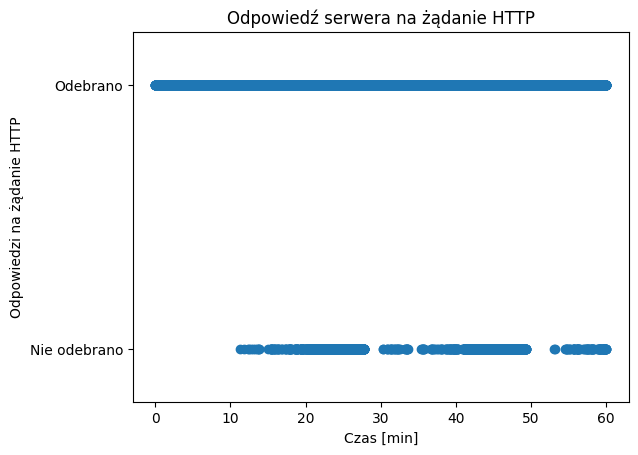

In [10]:
plt.scatter(x_time[0], y_correct[0])
plt.ylim(-0.2, 1.2) 
plt.yticks([0, 1], ['Nie odebrano', 'Odebrano'])
plt.xlabel('Czas [min]')
plt.ylabel('Odpowiedzi na żądanie HTTP')
plt.title('Odpowiedź serwera na żądanie HTTP')
plt.show()

### Comparing the ratios of correct to incorrect answers

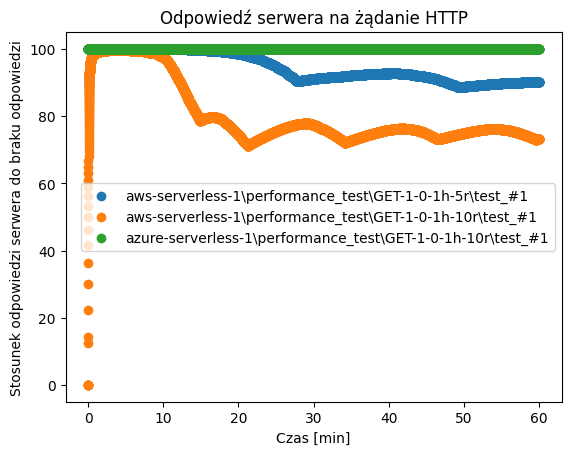

In [13]:
for i in range (0, len(results_paths)):
    plt.scatter(x_time[i], y_rate[i], label = paths[i])
plt.xlabel('Czas [min]')
plt.ylabel('Stosunek odpowiedzi serwera do braku odpowiedzi')
plt.title('Odpowiedź serwera na żądanie HTTP')
plt.legend()
plt.show()

### Plot of virtual users in time

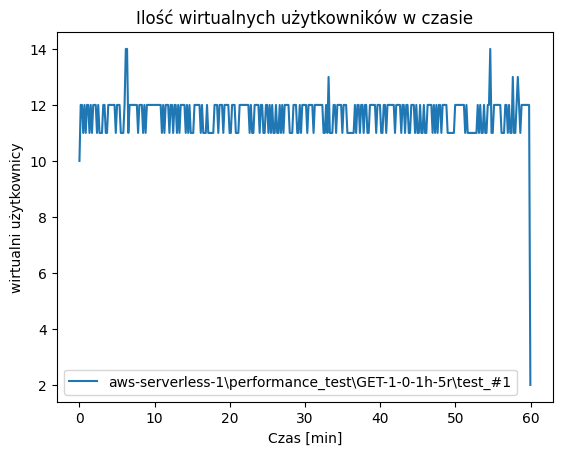

In [29]:
#for i in range (0, len(results_paths)):
plt.plot(x_time_vus[0][::10], y_vus[0][::10], label = paths[0])
plt.xlabel('Czas [min]')
plt.ylabel('wirtualni użytkownicy')
plt.title('Ilość wirtualnych użytkowników w czasie')
plt.legend()
plt.show()

In [ ]:
raise Exception("Wykonanie zatrzymane.")

Exception: Wykonanie zatrzymane.

In [ ]:
time_start = parser.isoparse(results_data[1]['data']['time'])
time_start = int(time_start.timestamp())

x = []
y = []

for i in range(0, len(json_object)):
    if json_object[i]['metric'] == "http_req_duration":
        if 'time' in json_object[i]['data']:
            time = int(parser.isoparse(json_object[i]['data']['time']).timestamp())
            x.append(time - time_start)
            y.append(json_object[i]['data']['value'])

NameError: name 'json_object' is not defined

## Table with summary data

## Plots with results data

In [ ]:
json_object = results_data
print(type(json_object[3]))
print(json_object[3])

<class 'dict'>
{'metric': 'vus_max', 'type': 'Point', 'data': {'time': '2023-05-27T16:04:41.4523453+02:00', 'value': 2000, 'tags': {}}}


In [ ]:
time_start = parser.isoparse(json_object[1]['data']['time'])
time_start = int(time_start.timestamp())

x = []
y = []

for i in range(0, len(json_object)):
    if json_object[i]['metric'] == "http_req_duration":
        if 'time' in json_object[i]['data']:
            time = int(parser.isoparse(json_object[i]['data']['time']).timestamp())
            x.append(time - time_start)
            y.append(json_object[i]['data']['value'])

In [ ]:
print(sum(y)/len(y))

11468.228059610716


In [ ]:
time_start = parser.isoparse(json_object[1]['data']['time'])
time_start = int(time_start.timestamp())

x = []
y = []

for i in range(0, len(json_object)):
    if json_object[i]['metric'] == "http_req_duration":
        if 'time' in json_object[i]['data']:
            time = int(parser.isoparse(json_object[i]['data']['time']).timestamp())
            x.append(int(time - time_start))
            y.append(json_object[i]['data']['value'])

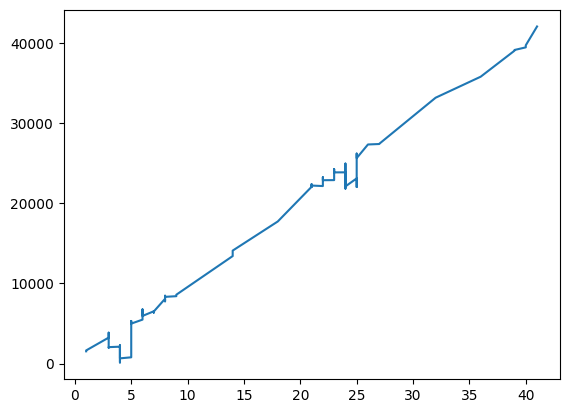

In [ ]:
plt.plot(x, y)
plt.show()

In [ ]:
z = [0] * len(x)
zz = [0] * len(x)
for i in range(0, len(x)):
    z[x[i] - 1] += 1
    zz[x[i] - 1] += y[i]
for i in range(0, len(x)):
    if z[i] != 0:
        zz[i] = zz[i]/z[i]
print(z)
print(zz)
print(sum(z))
print(sum(zz))
print(len(x))

[28, 0, 586, 472, 10, 15, 12, 29, 5, 0, 0, 0, 0, 8, 0, 0, 0, 1, 0, 0, 19, 108, 366, 322, 62, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
pairs = list(zip(z, zz))

# Sortowanie par na podstawie pierwszej listy
sorted_pairs = sorted(pairs, key=lambda x: x[0])

# Rozdzielenie posortowanych par na dwie listy
zx, zy = zip(*sorted_pairs)

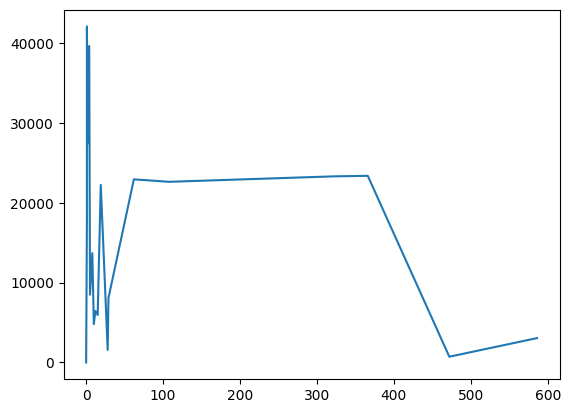

In [ ]:
plt.plot(zx, zy)
plt.show()

In [ ]:
time_start = parser.isoparse(json_object[1]['data']['time'])
time_start = int(time_start.timestamp())

x = [0]
y = [0]

for i in range(0, len(json_object)):
    if json_object[i]['metric'] == "vus":
        if 'time' in json_object[i]['data']:
            time = int(parser.isoparse(json_object[i]['data']['time']).timestamp())
            x.append(int(time - time_start))
            y.append(json_object[i]['data']['value'])

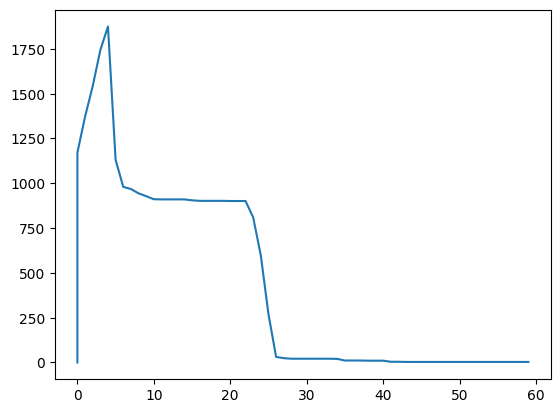

In [ ]:
plt.plot(x, y)
plt.show()